In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris;
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA;
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, adjusted_rand_score, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.stats import mode

In [2]:
iris = load_iris();

columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

iris = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=columns)


In [3]:
iris['species'] = iris['species'].astype(int)

In [4]:
display(iris)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
len(iris)

150

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [8]:
iris.isna().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [9]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [10]:
iris['species'].value_counts()

,count
species,
0,50
1,50
2,50


# Species Mapping:
**0: setosa - Smallest petals, wide sepals**  
**1: versicolor - Medium everything**  
**2: virginica - Largest petals, longest sepals**

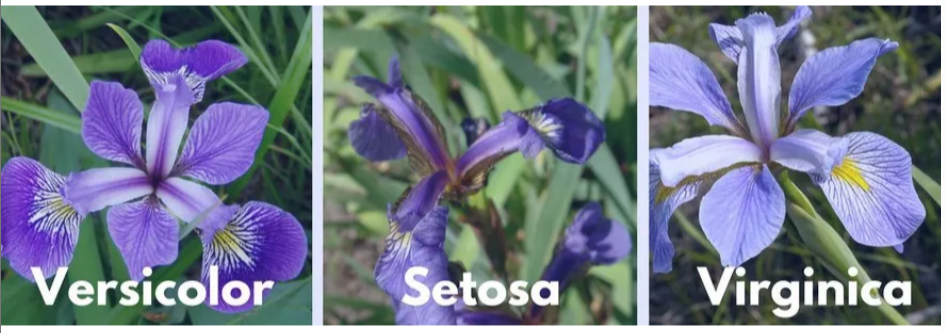

# EDA (Exploratory Data Analysis)

In [11]:
species_map = {
    0 : 'setosa',
    1 : 'versicolor',
    2 : 'virginica'
}



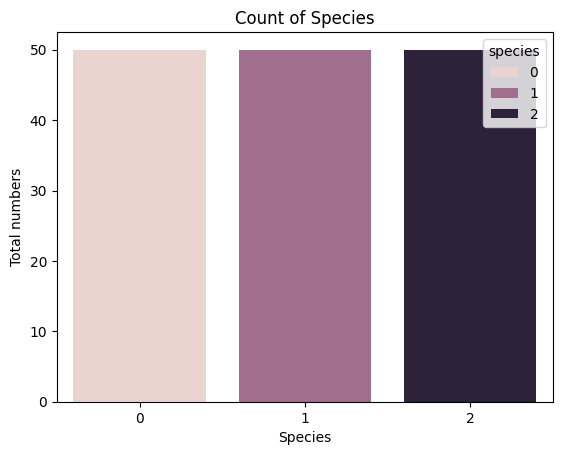

In [12]:
sns.countplot(data=iris, x='species', hue='species')
plt.title('Count of Species')
plt.xlabel('Species')
plt.ylabel('Total numbers')
plt.show()

#Correlation between Speceis and other columns

In [13]:
iris.corr()['species']

,species
sepal_length,0.782561
sepal_width,-0.426658
petal_length,0.949035
petal_width,0.956547
species,1.000000


**Key Note:**  
1. Petal length (0.95) & Petal width (0.96)
   * Strong positive correlation → species change is tightly linked to petal size.
   * Move from Setosa → Versicolor → Virginica, petals get longer and wider.

2. Sepal length (0.78)
   * Moderate-to-strong positive correlation → species with higher codes tend to have longer sepals.
   * Virginica has the longest, Setosa the shortest.

3. Sepal width (-0.43)
   * Negative correlation → Setosa has wider sepals, while Virginica has narrower ones.

#Scatter-Plot

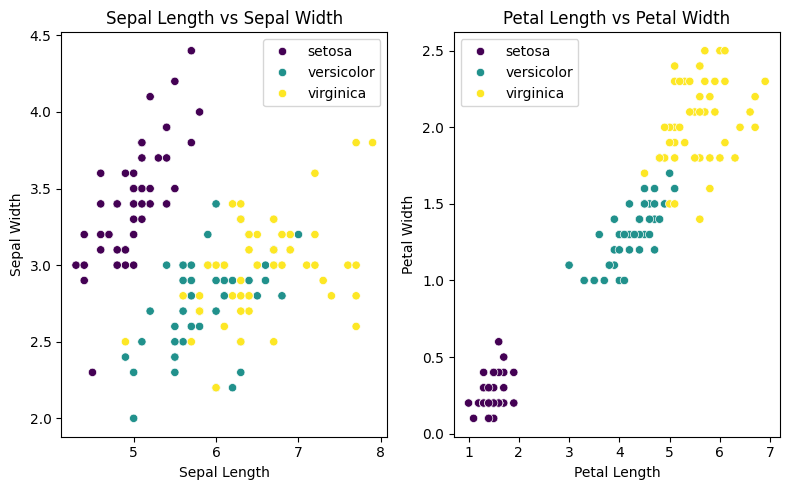

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(8,5))

ax1 = sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species', palette='viridis', ax=axes[0])
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles=handles, labels=species_map.values())
ax1.set_title('Sepal Length vs Sepal Width')
ax1.set_xlabel('Sepal Length')
ax1.set_ylabel('Sepal Width')

ax2 = sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species', palette='viridis', ax=axes[1])
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles=handles, labels=species_map.values())
ax2.set_title('Petal Length vs Petal Width')
ax2.set_xlabel('Petal Length')
ax2.set_ylabel('Petal Width')

plt.tight_layout()
plt.show()

**Key Note:**  
**1. Setosa is the most distinct species** → both sepal and petal features make it easy to separate.

**2. Versicolor and Virginica overlap** in sepal measurements, but are much better separated by petal features.

**3. Petal dimensions** are more discriminative than sepal dimensions for classifying species.

#Histogram Plot

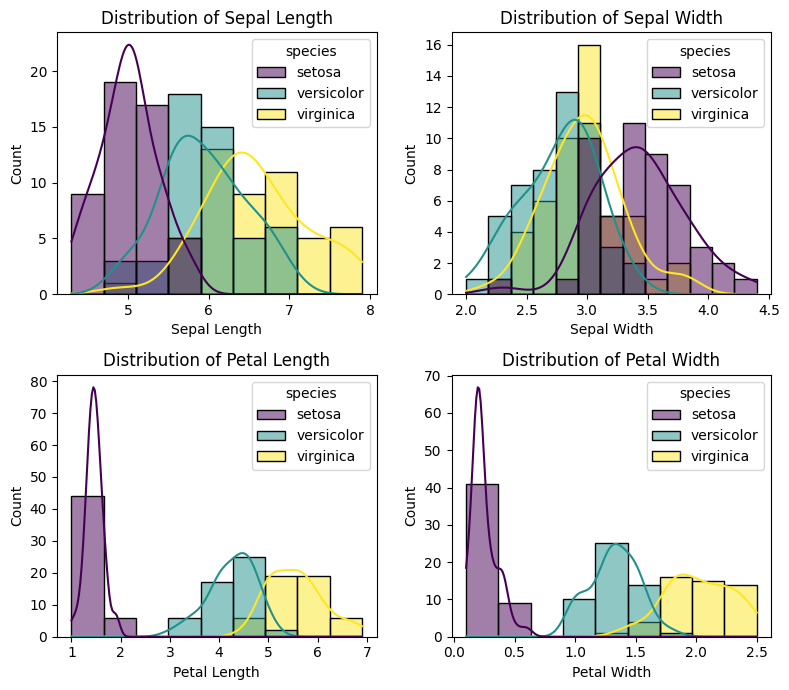

In [42]:
fig, axes = plt.subplots(2,2, figsize=(8, 7))

ax1 = sns.histplot(data=iris, x='sepal_length', hue='species', kde=True, palette='viridis', ax=axes[0,0])
ax1.set_title('Distribution of Sepal Length')
ax1.set_xlabel('Sepal Length')
ax1.set_ylabel('Count')

ax2 = sns.histplot(data=iris, x='sepal_width', hue='species', kde=True, palette='viridis', ax=axes[0,1])
ax2.set_title('Distribution of Sepal Width')
ax2.set_xlabel('Sepal Width')
ax2.set_ylabel('Count')

ax3 = sns.histplot(data=iris, x='petal_length', hue='species', kde=True, palette='viridis', ax=axes[1,0])
ax3.set_title('Distribution of Petal Length')
ax3.set_xlabel('Petal Length')
ax3.set_ylabel('Count')

ax4 = sns.histplot(data=iris, x='petal_width', hue='species', kde=True, palette='viridis', ax=axes[1,1])
ax4.set_title('Distribution of Petal Width')
ax4.set_xlabel('Petal Width')
ax4.set_ylabel('Count')

# Update legend labels
legends = [ax1.get_legend(), ax2.get_legend(), ax3.get_legend(), ax4.get_legend()]

for legend in legends:
  if legend is not None:  # Check if legend is not None
    for text in legend.get_texts():
        try:
            species_code = int(text.get_text())
            text.set_text(species_map[species_code])
        except (ValueError, KeyError):
            pass

plt.tight_layout()
plt.show()

**Key Note:**  
🌼 Setosa

* Sepal Length: Small (≈4.5–5.5), clearly separated.

* Sepal Width: Relatively wide (≈3.0–4.0).

* Petal Length: Very small (<2), completely distinct.

* Petal Width: Very narrow (<0.6), completely distinct.

👉 Easiest species to identify (well separated in petal features).   

🌸 Versicolor

* Sepal Length: Medium (≈5.5–7.0), overlaps with Virginica.

* Sepal Width: Narrow-medium (≈2.5–3.2), overlaps with Virginica.

* Petal Length: Medium (≈3–5), overlaps with Virginica.

* Petal Width: Medium (≈1–1.8), overlaps with Virginica.

👉 Intermediate group, often confused with Virginica.  

🌺 Virginica

* Sepal Length: Largest (≈6.0–7.8).

* Sepal Width: Moderate (≈2.5–3.5), overlaps with Versicolor.

* Petal Length: Longest (≈4.5–6.9), overlaps partly with Versicolor.

* Petal Width: Widest (≈1.5–2.5), overlaps partly with Versicolor.

👉 Separated best by petal length & width, less so by sepal.

#Violin Plots

/tmp/ipython-input-2515516180.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.violinplot(data=iris, x='species', y='sepal_length', palette='viridis', ax=axes[0,0])
/tmp/ipython-input-2515516180.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.violinplot(data=iris, x='species', y='sepal_width', palette='viridis', ax=axes[0,1])
/tmp/ipython-input-2515516180.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax3 = sns.violinplot(data=iris, x='species', y='petal_length', palette='viridis', ax=axes[1,0])
/tmp/ipython-input-2515516180.py:6: FutureWarning:

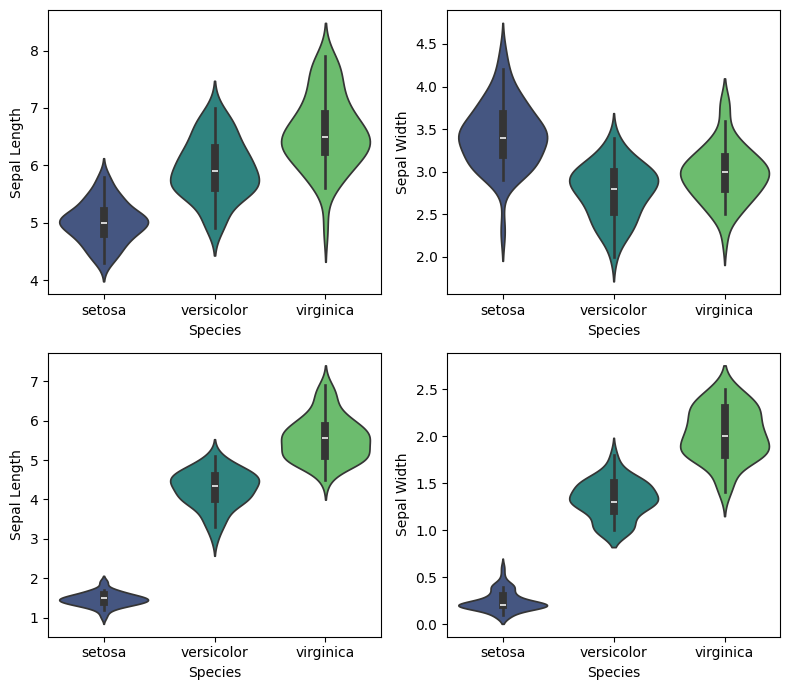

In [43]:
fig, axes = plt.subplots(2, 2, figsize=(8, 7))

ax1 = sns.violinplot(data=iris, x='species', y='sepal_length', palette='viridis', ax=axes[0,0])
ax2 = sns.violinplot(data=iris, x='species', y='sepal_width', palette='viridis', ax=axes[0,1])
ax3 = sns.violinplot(data=iris, x='species', y='petal_length', palette='viridis', ax=axes[1,0])
ax4 = sns.violinplot(data=iris, x='species', y='petal_width', palette='viridis', ax=axes[1,1])

# Update x-axis tick labels
species_codes = sorted(iris['species'].unique())
ax1.set_xticks(species_codes)
ax1.set_xticklabels([species_map[code] for code in species_codes])

ax2.set_xticks(species_codes)
ax2.set_xticklabels([species_map[code] for code in species_codes])

ax3.set_xticks(species_codes)
ax3.set_xticklabels([species_map[code] for code in species_codes])

ax4.set_xticks(species_codes)
ax4.set_xticklabels([species_map[code] for code in species_codes])


ax1.set_xlabel('Species')
ax1.set_ylabel('Sepal Length')

ax2.set_xlabel('Species')
ax2.set_ylabel('Sepal Width')

ax3.set_xlabel('Species')
ax3.set_ylabel('Sepal Length')

ax4.set_xlabel('Species')
ax4.set_ylabel('Sepal Width')

plt.tight_layout()
plt.show()

**Key Note:**
* Sepal length increases from Setosa → Versicolor → Virginica, but Versicolor and Virginica overlap.

* Petal length cleanly separates all three species, with Setosa fully distinct and little overlap between the other two.

/tmp/ipython-input-398945261.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.boxplot(ax = axes[0,0], data = iris, x = "species", y = 'sepal_length', palette='viridis')
/tmp/ipython-input-398945261.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.boxplot(ax = axes[0,1], data = iris, x = "species", y = 'sepal_width', palette='viridis')
/tmp/ipython-input-398945261.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax3 = sns.boxplot(ax = axes[1,0], data = iris, x = "species", y = 'petal_length', palette='viridis')
/tmp/ipython-input-398945261.py:24: 

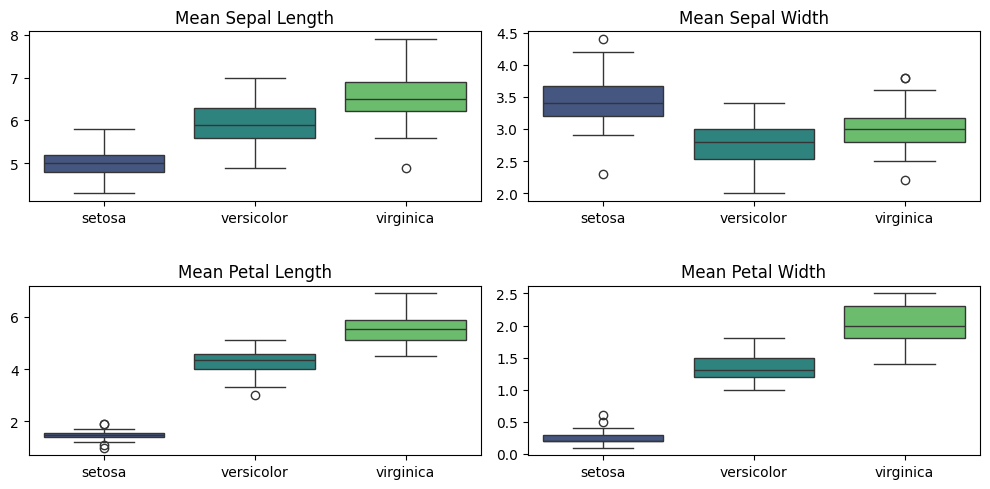

In [17]:
#box plots
fig, axes = plt.subplots(2, 2, figsize=(10,5), dpi = 100)

#Mean Sepal Length
ax1 = sns.boxplot(ax = axes[0,0], data = iris, x = "species", y = 'sepal_length', palette='viridis')
axes[0,0].set_xlabel(None)
axes[0,0].set_ylabel(None)
axes[0,0].set_title("Mean Sepal Length")


#Mean Sepal Width
ax2 = sns.boxplot(ax = axes[0,1], data = iris, x = "species", y = 'sepal_width', palette='viridis')
axes[0,1].set_xlabel(None)
axes[0,1].set_ylabel(None)
axes[0,1].set_title("Mean Sepal Width")

#Mean Petal Length
ax3 = sns.boxplot(ax = axes[1,0], data = iris, x = "species", y = 'petal_length', palette='viridis')
axes[1,0].set_xlabel(None)
axes[1,0].set_ylabel(None)
axes[1,0].set_title("Mean Petal Length")

#Mean Petal Width
ax4 = sns.boxplot(ax = axes[1,1], data = iris, x = "species", y = 'petal_width', palette='viridis')
axes[1,1].set_xlabel(None)
axes[1,1].set_ylabel(None)
axes[1,1].set_title("Mean Petal Width")

species_codes = sorted(iris['species'].unique())
ax1.set_xticks(species_codes)
ax1.set_xticklabels([species_map[code] for code in species_codes])

ax2.set_xticks(species_codes)
ax2.set_xticklabels([species_map[code] for code in species_codes])

ax3.set_xticks(species_codes)
ax3.set_xticklabels([species_map[code] for code in species_codes])

ax4.set_xticks(species_codes)
ax4.set_xticklabels([species_map[code] for code in species_codes])


plt.tight_layout()
plt.subplots_adjust(hspace=0.5)

**Key Note:**  
Scatter and box plots confirmed the aforementioned conclusion, setosa is easily separable based on petal length and width.

#Feature Engineering

In [18]:
x = iris.drop('species', axis=1)
y = iris['species']

In [19]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
# feature scaling
x_train_scaled = StandardScaler().fit_transform(x_train)
x_test_scaled = StandardScaler().fit_transform(x_test)

# Applying PCA (Principle Component Analysis) - to reduce the number of features.

In [21]:
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

In [22]:
print('Explained variance ratios: ', pca.explained_variance_ratio_)

Explained variance ratios:  [0.72551423 0.23000922]


**Key Note:**  
* PC1 (72.6%) → captures the majority of variance in the data.

* PC2 (23.0%) → captures most of the remaining variance.

* Together (95.6%) → The first two principal components capture nearly all of the variation in the dataset, which means we can reduce the data to two dimensions.

In [23]:
# Interpreting Principle components
print(pd.DataFrame(pca.components_, columns=iris.columns[:-1]))

   sepal_length  sepal_width  petal_length  petal_width
0      0.517428    -0.271201      0.582280     0.565392
1      0.391109     0.918127      0.021807     0.060009


In [24]:
print(x_test_pca[:10])

[[ 0.46457455 -0.52100512]
 [-2.10469855  1.6141732 ]
 [ 3.09210956 -0.14398247]
 [ 0.47901281 -0.30517338]
 [ 1.07452111 -0.17522239]
 [-1.99814551  0.50712371]
 [-0.20140773 -0.51936772]
 [ 1.65642615  0.67141367]
 [ 1.10547473 -1.91017242]
 [ 0.09212764 -0.91460201]]


# Model Traning with Clustering

**K-Means clustering Algorithm**

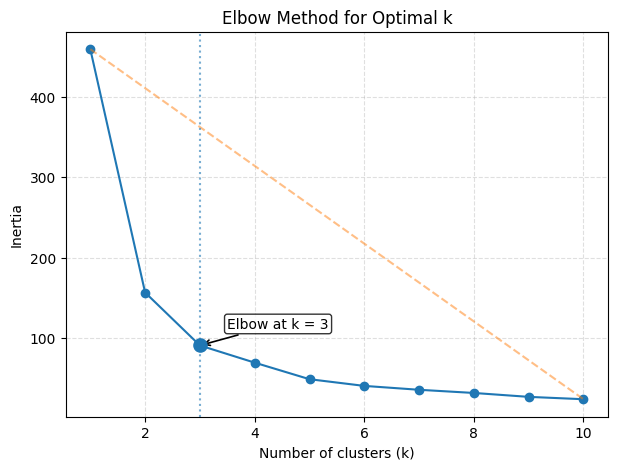

Suggested k (elbow): 3


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 1) Compute inertia for a range of K
Ks = range(1, 11)
inertia = []
for k in Ks:
    km = KMeans(n_clusters=k, init='k-means++', random_state=42)
    km.fit(x_train_pca)
    inertia.append(km.inertia_)
inertia = np.array(inertia, dtype=float)

# 2) Find the elbow (knee) = point with max distance from the line
#    drawn between (K_min, inertia_max) and (K_max, inertia_min)
x = np.array(list(Ks), dtype=float)
y = inertia

p1 = np.array([x[0], y[0]])
p2 = np.array([x[-1], y[-1]])

# Vector from p1 to p2
line_vec = p2 - p1
line_len = np.hypot(*(line_vec))
line_unitvec = line_vec / (line_len if line_len != 0 else 1.0)

# Vector from p1 to each point
p1_to_points = np.column_stack((x, y)) - p1

# Perpendicular distance from each point to the baseline
# distance = |(p1_to_points - proj_on_line)| length
projections = (p1_to_points @ line_unitvec)[:, None] * line_unitvec
perp_vecs = p1_to_points - projections
dists = np.hypot(perp_vecs[:, 0], perp_vecs[:, 1])

# Elbow index is the argmax of distances (skip k=1 edge case if you like)
elbow_idx = int(np.argmax(dists))
elbow_k = int(x[elbow_idx])

# 3) Plot with clear annotations
plt.figure(figsize=(7, 5))
plt.plot(x, y, 'o-', linewidth=1.5, markersize=6)
plt.grid(True, linestyle='--', alpha=0.4)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

# Baseline (faint) and perpendicular helper (optional)
plt.plot([x[0], x[-1]], [y[0], y[-1]], linestyle='--', alpha=0.5)

# Highlight the chosen elbow
plt.scatter([elbow_k], [y[elbow_idx]], s=90, zorder=5)
plt.axvline(elbow_k, linestyle=':', alpha=0.6)
plt.annotate(
    f'Elbow at k = {elbow_k}',
    xy=(elbow_k, y[elbow_idx]),
    xytext=(elbow_k + 0.5, y[elbow_idx] + 0.05*(y[0]-y[-1])),
    arrowprops=dict(arrowstyle='->', lw=1.2),
    bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.8)
)

plt.show()

print(f"Suggested k (elbow): {elbow_k}")


/tmp/ipython-input-1381081755.py:25: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  d = np.abs(np.cross(p2-p1, p1-p)) / np.linalg.norm(p2-p1)
/tmp/ipython-input-1381081755.py:94: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  d = np.abs(np.cross(p2-p1, p1-p)) / np.linalg.norm(p2-p1)


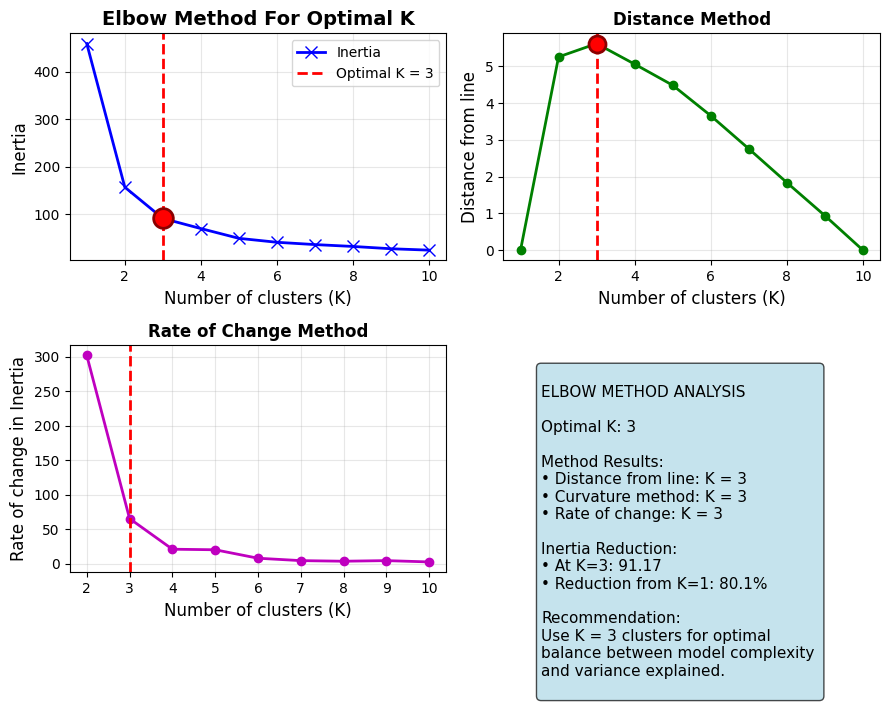

ADVANCED ELBOW METHOD ANALYSIS
Optimal K detected: 3
Inertia at optimal K: 91.17
Variance reduction from K=1: 80.1%

Method comparison:
  Distance from line method: K = 3
  Curvature method: K = 3
  Rate of change method: K = 3

Inertia values for each K:
  K=1: 458.65
  K=2: 156.85
  K=3: 91.17 ← OPTIMAL
  K=4: 69.83
  K=5: 49.30
  K=6: 41.00
  K=7: 36.18
  K=8: 32.23
  K=9: 27.40
  K=10: 24.47


In [48]:
# Advanced Elbow Method with Automatic K Detection
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def calculate_elbow_point(k_values, inertias):
    """
    Calculate the optimal K using multiple methods:
    1. Maximum curvature method
    2. Distance from line method
    3. Second derivative method
    """

    # Method 1: Distance from line connecting first and last points
    def distance_from_line(k_vals, inertias):
        # Line from first to last point
        p1 = np.array([k_vals[0], inertias[0]])
        p2 = np.array([k_vals[-1], inertias[-1]])

        distances = []
        for i in range(len(k_vals)):
            p = np.array([k_vals[i], inertias[i]])
            # Distance from point to line
            d = np.abs(np.cross(p2-p1, p1-p)) / np.linalg.norm(p2-p1)
            distances.append(d)

        return np.argmax(distances), max(distances)

    # Method 2: Second derivative (curvature) method
    def second_derivative_method(inertias):
        # Calculate second derivatives
        second_derivatives = np.diff(inertias, n=2)
        # Find the point with maximum second derivative (most curved)
        return np.argmax(second_derivatives) + 2  # +2 because of double diff

    # Method 3: Rate of change method
    def rate_of_change_method(inertias):
        # Calculate rate of change
        rates = np.diff(inertias)
        # Find where rate of change starts to level off
        rate_changes = np.diff(rates)
        return np.argmax(rate_changes) + 2  # +2 because of double diff

    # Apply methods
    elbow_idx_line, max_distance = distance_from_line(k_values, inertias)
    elbow_idx_curve = second_derivative_method(inertias)
    elbow_idx_rate = rate_of_change_method(inertias)

    # Consensus approach - use the most common result
    methods = [elbow_idx_line, elbow_idx_curve, elbow_idx_rate]
    optimal_idx = max(set(methods), key=methods.count)

    return optimal_idx, methods, max_distance

# Choosing K: Advanced Elbow Method
inertia = []
k = range(1, 11)

# Calculate inertias
for i in k:
    km = KMeans(n_clusters=i, init='k-means++', random_state=42)
    km.fit(x_train_pca)
    inertia.append(km.inertia_)

# Find optimal K
optimal_idx, method_results, max_dist = calculate_elbow_point(list(k), inertia)
optimal_k = k[optimal_idx]

# Create enhanced visualization
plt.figure(figsize=(9, 7))

# Main plot
plt.subplot(2, 2, 1)
plt.plot(k, inertia, 'bx-', linewidth=2, markersize=8, label='Inertia')
plt.axvline(x=optimal_k, color='red', linestyle='--', linewidth=2,
            label=f'Optimal K = {optimal_k}')
plt.scatter(optimal_k, inertia[optimal_idx], color='red', s=200,
           marker='o', edgecolor='darkred', linewidth=2, zorder=5)
plt.xlabel('Number of clusters (K)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Method For Optimal K', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()

# Distance from line visualization
plt.subplot(2, 2, 2)
# Calculate distances for visualization
p1 = np.array([k[0], inertia[0]])
p2 = np.array([k[-1], inertia[-1]])
distances = []
for i in range(len(k)):
    p = np.array([k[i], inertia[i]])
    d = np.abs(np.cross(p2-p1, p1-p)) / np.linalg.norm(p2-p1)
    distances.append(d)

plt.plot(k, distances, 'go-', linewidth=2, markersize=6)
plt.axvline(x=optimal_k, color='red', linestyle='--', linewidth=2)
plt.scatter(optimal_k, distances[optimal_idx], color='red', s=150,
           marker='o', edgecolor='darkred', linewidth=2, zorder=5)
plt.xlabel('Number of clusters (K)', fontsize=12)
plt.ylabel('Distance from line', fontsize=12)
plt.title('Distance Method', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

# Rate of change visualization
plt.subplot(2, 2, 3)
rate_of_change = np.abs(np.diff(inertia))
plt.plot(k[1:], rate_of_change, 'mo-', linewidth=2, markersize=6)
plt.axvline(x=optimal_k, color='red', linestyle='--', linewidth=2)
plt.xlabel('Number of clusters (K)', fontsize=12)
plt.ylabel('Rate of change in Inertia', fontsize=12)
plt.title('Rate of Change Method', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

# Summary statistics
plt.subplot(2, 2, 4)
plt.axis('off')
summary_text = f"""
ELBOW METHOD ANALYSIS

Optimal K: {optimal_k}

Method Results:
• Distance from line: K = {k[method_results[0]]}
• Curvature method: K = {k[method_results[1]]}
• Rate of change: K = {k[method_results[2]]}

Inertia Reduction:
• At K={optimal_k}: {inertia[optimal_idx]:.2f}
• Reduction from K=1: {((inertia[0]-inertia[optimal_idx])/inertia[0]*100):.1f}%

Recommendation:
Use K = {optimal_k} clusters for optimal
balance between model complexity
and variance explained.
"""
plt.text(0.1, 0.9, summary_text, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))

plt.tight_layout()
plt.show()

# Print detailed results
print("="*60)
print("ADVANCED ELBOW METHOD ANALYSIS")
print("="*60)
print(f"Optimal K detected: {optimal_k}")
print(f"Inertia at optimal K: {inertia[optimal_idx]:.2f}")
print(f"Variance reduction from K=1: {((inertia[0]-inertia[optimal_idx])/inertia[0]*100):.1f}%")
print("\nMethod comparison:")
print(f"  Distance from line method: K = {k[method_results[0]]}")
print(f"  Curvature method: K = {k[method_results[1]]}")
print(f"  Rate of change method: K = {k[method_results[2]]}")
print("\nInertia values for each K:")
for i, (k_val, inert) in enumerate(zip(k, inertia)):
    marker = " ← OPTIMAL" if i == optimal_idx else ""
    print(f"  K={k_val}: {inert:.2f}{marker}")

In [26]:
# Apply K-Means with k-means++ initialization

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(x_train_pca)

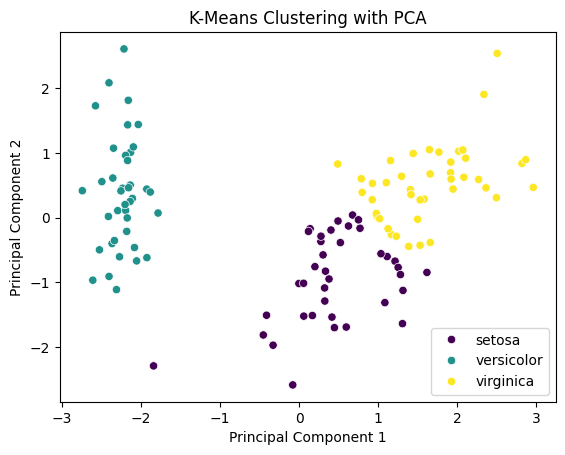

In [27]:
# iris['Cluster_PCA'] = cluster_labels

ax = sns.scatterplot(x=x_train_pca[:, 0], y=x_train_pca[:, 1], hue=cluster_labels, palette='viridis')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=species_map.values())

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with PCA')
plt.show()

In [28]:
# Predict clusters for the test dataset
y_test_pred = kmeans.predict(x_test_pca)

# Evaluation

**Confusion Matrix & Accuracy**

In [29]:
# Map predicted clusters to true labels using majority voting on train set
labels_map = {}
for cluster in np.unique(cluster_labels):
  mask = (cluster_labels == cluster)
  labels, counts = np.unique(y_train[mask], return_counts=True)
  labels_map[cluster] = labels[np.argmax(counts)]

y_test_pred = np.vectorize(labels_map.get)(y_test_pred)

cm = confusion_matrix(y_test, y_test_pred)

cm_df = pd.DataFrame(cm, index=[species_map[i] for i in sorted(species_map.keys())],  # rows = true labels
                     columns = [species_map[i] for i in sorted(species_map.keys())])   # columsn = predicted labels
print("Confusion Matrix with Species Names:")
print(cm_df)

print("Accuracy:", accuracy_score(y_test, y_test_pred))

Confusion Matrix with Species Names:
            setosa  versicolor  virginica
setosa          10           0          0
versicolor       0           7          2
virginica        0           1         10
Accuracy: 0.9


In [30]:
print(classification_report(
    y_test,
    y_test_pred,
    target_names=[species_map[i] for i in sorted(species_map.keys())]))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.88      0.78      0.82         9
   virginica       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



# Evaluation of K-Means on Iris

* Setosa: perfectly clustered (10/10).

* Versicolor: 7 correct, 2 misclassified as Virginica.

* Virginica: 10 correct, 1 misclassified as Versicolor.

* Accuracy = 90% → strong result for unsupervised learning.

✅ Key Point: Setosa is fully distinct, while Versicolor and Virginica overlap slightly.

#Adjusted Rand Index (ARI)

In [31]:
ari = adjusted_rand_score(y_test, y_test_pred)
print("Adjusted Rand Index (ARI): ", ari)

Adjusted Rand Index (ARI):  0.7288460833323148


**Adjusted Rand Index (ARI) = 0.73** → shows strong alignment between K-Means clusters and true species. Clusters are well-formed, with most confusion only between Versicolor and Virginica.

#Hierarchical Clustering

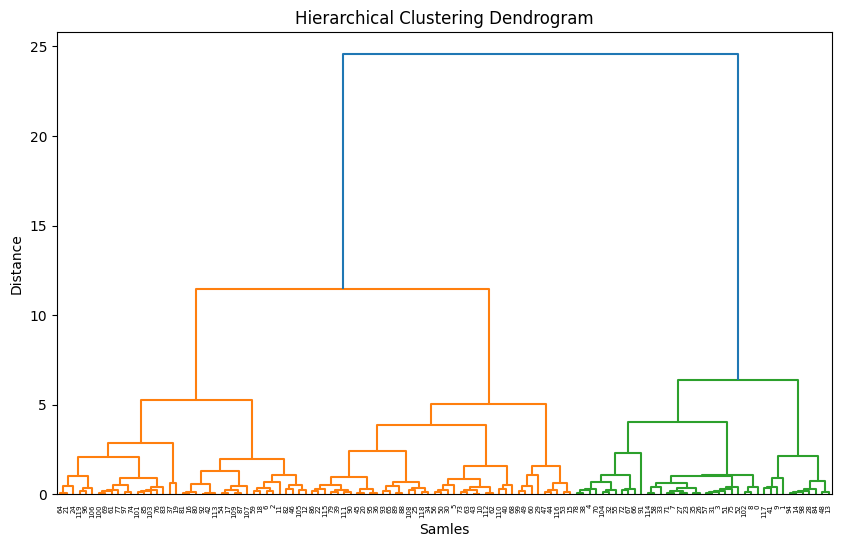

In [32]:
plt.figure(figsize=(10, 6))
linked = linkage(x_train_pca, method='ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samles')
plt.ylabel('Distance')
plt.show()

In [33]:
# assign clusters
hc_clusters = fcluster(linked, t=3, criterion='maxclust')

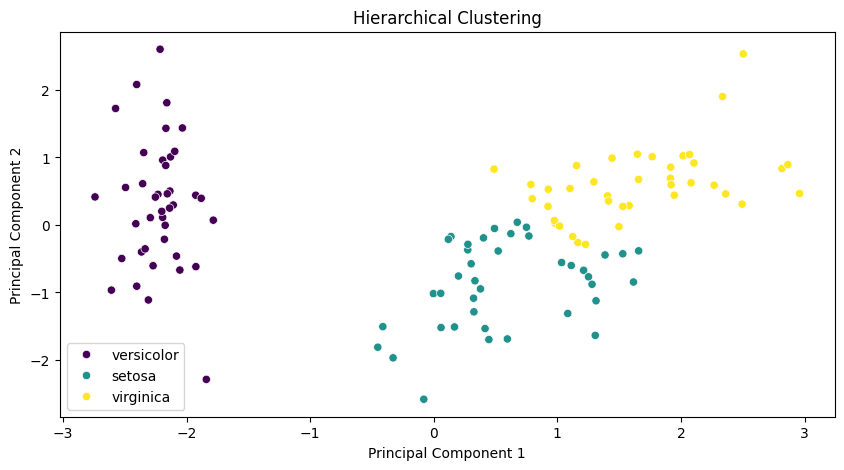

In [34]:
#visualise clusters
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(x=x_train_pca[:, 0], y=x_train_pca[:, 1], hue=hc_clusters, palette='viridis')

hc_species_labels = [species_map[1] if label == 1 else (species_map[0] if label == 2 else species_map[2]) for label in sorted(np.unique(hc_clusters))]

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=hc_species_labels)

plt.title('Hierarchical Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#Evaluation

In [35]:
map_hc = {}

for c in np.unique(hc_clusters):
  mask = hc_clusters == c
  mode_result = mode(y_train[mask], keepdims=True)
  map_hc[c] = mode_result[0][0]

hc_clusters = np.vectorize(map_hc.get)(hc_clusters)

print("Confusion Matrix (Training Data): ")
print(confusion_matrix(y_train, hc_clusters))
print("Accuracy (Training Data): ", accuracy_score(y_train, hc_clusters))
print("Adjusted Rand Index (Training Data): ", adjusted_rand_score(y_train, hc_clusters))

Confusion Matrix (Training Data): 
[[40  0  0]
 [ 0 30 11]
 [ 0 11 28]]
Accuracy (Training Data):  0.8166666666666667
Adjusted Rand Index (Training Data):  0.5945225310804908


In [36]:
print(classification_report(
    y_train,
    hc_clusters,
    target_names=[species_map[i] for i in sorted(species_map.keys())]))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.73      0.73      0.73        41
   virginica       0.72      0.72      0.72        39

    accuracy                           0.82       120
   macro avg       0.82      0.82      0.82       120
weighted avg       0.82      0.82      0.82       120



**Key Note:**  
* Setosa: perfectly clustered (40/40).

* Versicolor: 30 correct, 11 misclassified as Virginica.

* Virginica: 28 correct, 11 misclassified as Versicolor.

* Accuracy = 81.7%, ARI = 0.59 → good clustering, but weaker than K-Means.

✅ Clear separation for Setosa; overlap remains between Versicolor and Virginica.

#DBSCAN (Density Based Spatial Clustering) Algorithm



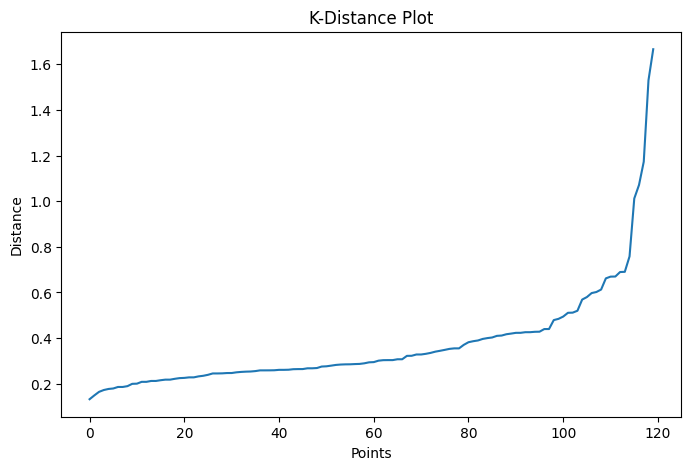

In [37]:
# Use K-distance to choose eps

k=5
neighbor = NearestNeighbors(n_neighbors=k)
neighbors = neighbor.fit(x_train_pca)
distances, indices = neighbors.kneighbors(x_train_pca)

k_distances = np.sort(distances[:, k-1])

plt.figure(figsize=(8, 5))
plt.plot(k_distances)
plt.xlabel('Points')
plt.ylabel('Distance')
plt.title('K-Distance Plot')
plt.show()

The elbow in the k-distance graph appears at ≈0.5, which is where the distances start to increase more sharply.
Therefore, eps = 0.5 as the optimal neighborhood size for DBSCAN.

In [38]:
db = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
y_pred = db.fit_predict(x_train_pca)

In [39]:
print(y_pred)

[ 1 -1  0  1  1  0  0  1  1  1  0  0  0  1  1  0  0  0  0 -1  0 -1  0  1
 -1  0  1  1  1 -1  0  1  1  1  0  1  0 -1  1  0  0  1  0  0  0  0  0  0
  1 -1  0  1  1  0  0  1  0  1  1  0  0  0  0  0 -1  0  1  1 -1  0  1  1
  1  0  0  1  0  0  1  0  0  0  0  0  1  0  0  0  0  0  0 -1  0  0  1  0
  0  0  1 -1  0  0  1  0  1  0  0  0  0  0  0  0  0  0  1  0  0  1  0  0]


In [40]:
print("Unique Cluster Labels: ", set(y_pred))

Unique Cluster Labels:  {np.int64(0), np.int64(1), np.int64(-1)}


Here:
DBSCAN produced 3 labels:

* Cluster 0 → main dense group

* Cluster 1 → second dense group

* -1 → noise points (outliers)

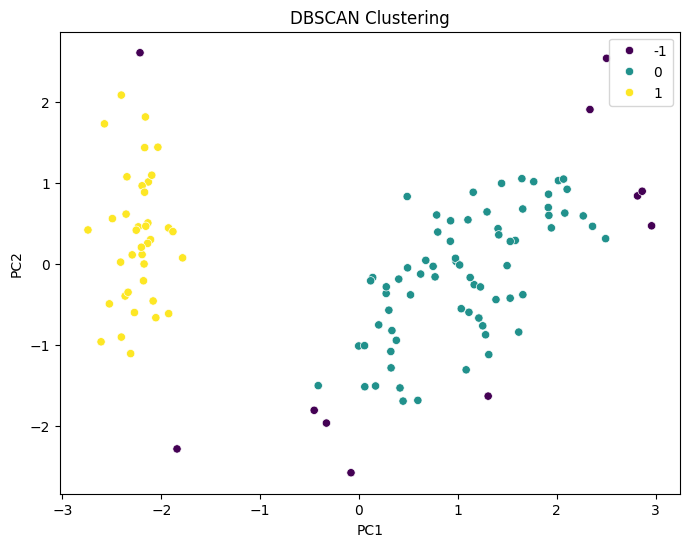

In [41]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_train_pca[:, 0], y=x_train_pca[:, 1], hue=y_pred, palette='viridis')

plt.title("DBSCAN Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

DBSCAN discovered 2 main clusters and a few noise points.

* Cluster 1 (yellow) → clearly matches Setosa.

* Cluster 0 (teal) → combines Versicolor and Virginica.

* Noise (-1, purple) → a handful of outliers excluded.

**Key Insight**  

Across all methods, Setosa is consistently distinct.  
The main challenge lies in separating Versicolor and Virginica, which overlap significantly in feature space.  
K-Means provides the best overall clustering performance on this dataset.